# Model Creation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv("../Datasets/Extracted_Features.csv")
df.head()

,features,class
0,"[-113.59882, 121.57067, -19.162262, 42.363937,...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686691,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855278, 1....",blues
4,"[-160.35417, 126.209496, -35.581394, 22.139256...",blues


In [35]:
np.array(df['features'][0][1:-1].split(', '), dtype='float64')

array([-1.1359882e+02,  1.2157067e+02, -1.9162262e+01,  4.2363937e+01,
       -6.3622660e+00,  1.8621931e+01, -1.3699734e+01,  1.5339802e+01,
       -1.2274304e+01,  1.0970945e+01, -8.3260610e+00,  8.8020880e+00,
       -3.6699412e+00,  5.7446756e+00, -5.1627830e+00,  7.5170636e-01,
       -1.6878540e+00, -4.0873003e-01, -2.3026767e+00,  1.2224671e+00,
       -3.5328746e+00, -1.1397805e+00, -4.2828280e+00, -4.2260840e+00,
        9.1518750e-01,  9.1406375e-01, -5.7618070e+00, -3.9328036e+00,
        1.5094346e+00,  2.6984656e+00,  5.6560730e+00, -3.2690074e+00,
       -2.0606379e-01, -2.9996982e+00,  4.4763170e+00, -4.7685504e-01,
        6.0062850e+00, -5.9690364e-02, -3.4585848e+00, -1.8418322e+00])

In [38]:
df['features'] = df['features'].apply(lambda x: np.array(x[1:-1].split(', '), dtype='float64'))

In [43]:
df['features'][0]

array([-1.1359882e+02,  1.2157067e+02, -1.9162262e+01,  4.2363937e+01,
       -6.3622660e+00,  1.8621931e+01, -1.3699734e+01,  1.5339802e+01,
       -1.2274304e+01,  1.0970945e+01, -8.3260610e+00,  8.8020880e+00,
       -3.6699412e+00,  5.7446756e+00, -5.1627830e+00,  7.5170636e-01,
       -1.6878540e+00, -4.0873003e-01, -2.3026767e+00,  1.2224671e+00,
       -3.5328746e+00, -1.1397805e+00, -4.2828280e+00, -4.2260840e+00,
        9.1518750e-01,  9.1406375e-01, -5.7618070e+00, -3.9328036e+00,
        1.5094346e+00,  2.6984656e+00,  5.6560730e+00, -3.2690074e+00,
       -2.0606379e-01, -2.9996982e+00,  4.4763170e+00, -4.7685504e-01,
        6.0062850e+00, -5.9690364e-02, -3.4585848e+00, -1.8418322e+00])

In [44]:
X = np.array(df['features'].tolist())
y = np.array(df['class'].tolist())

In [51]:
X.shape

(999, 40)

In [46]:
y = np.array(pd.get_dummies(y))

In [47]:
y.shape

(999, 10)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [49]:
y_test.shape

(200, 10)

In [50]:
num_classes = y.shape[1]
num_classes

10

In [79]:
model = Sequential()
model.add(Dense(128, input_shape=(40,), activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               5248      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [80]:
num_epochs = 100
num_batch_size = 32

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_split=0.2)

Epoch 1/100
20/20 [==============================] - 1s 33ms/step - loss: 2.3596 - accuracy: 0.2113 - val_loss: 3.9187 - val_accuracy: 0.1250
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 1.9452 - accuracy: 0.3161 - val_loss: 2.5437 - val_accuracy: 0.1813
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 1.9070 - accuracy: 0.3505 - val_loss: 2.3184 - val_accuracy: 0.2000
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 1.8244 - accuracy: 0.3584 - val_loss: 2.0358 - val_accuracy: 0.2313
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 1.7514 - accuracy: 0.3568 - val_loss: 1.7825 - val_accuracy: 0.3063
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 1.6088 - accuracy: 0.4022 - val_loss: 1.7107 - val_accuracy: 0.3313
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 1.6360 - accuracy: 0.4272 - val_loss: 1.6295 - val_accuracy: 0.3750
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8221 - accuracy: 0.6948 - val_loss: 1.4498 - val_accuracy: 0.5312
Epoch 60/100
20/20 [==============================] - 0s 6ms/step - loss: 0.9268 - accuracy: 0.6557 - val_loss: 1.4469 - val_accuracy: 0.5500
Epoch 61/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8732 - accuracy: 0.6995 - val_loss: 1.3614 - val_accuracy: 0.5437
Epoch 62/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8875 - accuracy: 0.6808 - val_loss: 1.4461 - val_accuracy: 0.5500
Epoch 63/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8560 - accuracy: 0.6995 - val_loss: 1.4513 - val_accuracy: 0.5188
Epoch 64/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8048 - accuracy: 0.7027 - val_loss: 1.4645 - val_accuracy: 0.5312
Epoch 65/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8181 - accuracy: 0.7105 - val_loss: 1.4642 - val_accuracy: 0.5750
Epoch 

In [81]:
def plot_acc(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title("Accuracy vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [82]:
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='acc')
    plt.plot(history.history['val_loss'], label='val_acc')
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

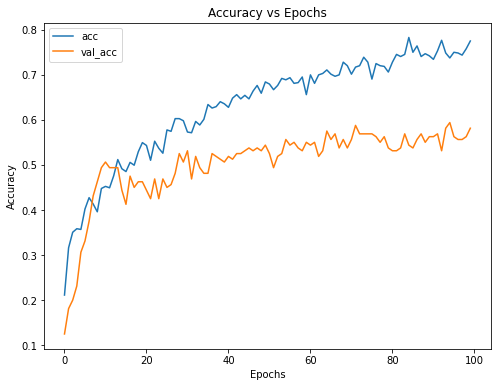

In [83]:
plot_acc(model.history)

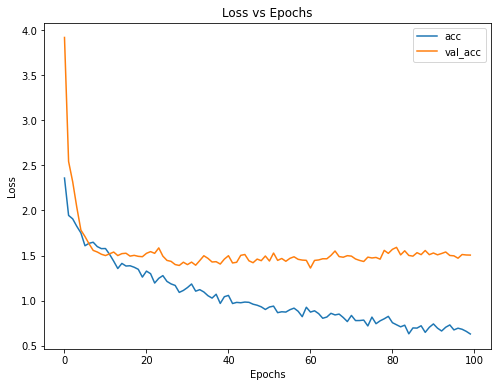

In [84]:
plot_loss(model.history)

## Testing

In [97]:
test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy[1])

7/7 [==============================] - 0s 3ms/step - loss: 1.8346 - accuracy: 0.6150
Test Accuracy: 0.6150000095367432


In [85]:
import librosa

In [86]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfcc_feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_feature.T, axis=0)
    
    return mfcc_scaled_features

In [143]:
def predict(file, class_labels):
    prediction_feature = feature_extractor(file)
    prediction_feature = prediction_feature.reshape(1, -1)
    preds = model.predict(prediction_feature)
    out = tf.argmax(input=preds, axis=1).numpy()[0]
    
    return class_labels[out]

In [101]:
file = "../Data/genres_original/hiphop/hiphop.00003.wav"
prediction_feature = feature_extractor(file)
prediction_feature.shape

(40,)

In [109]:
prediction_feature = prediction_feature.reshape(1, -1)
prediction_feature.shape

(1, 40)

In [111]:
preds = model.predict(prediction_feature)

1/1 [==============================] - 0s 16ms/step


In [114]:
preds

array([[1.4912422e-02, 3.2907272e-05, 2.8918975e-03, 8.2425447e-03,
        9.3694401e-01, 3.2094019e-04, 1.1853818e-02, 4.1695440e-04,
        5.6931023e-03, 1.8691510e-02]], dtype=float32)

In [131]:
out = tf.argmax(input=preds, axis=1).numpy()[0]

In [140]:
class_labels = df['class'].unique()

In [141]:
class_labels

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [142]:
class_labels[out]

'hiphop'

In [144]:
predict('../Data/genres_original/metal/metal.00005.wav', class_labels)

1/1 [==============================] - 0s 16ms/step


'metal'

In [145]:
predict('../Data/Test/VaddiSong.wav', class_labels)

1/1 [==============================] - 0s 15ms/step


'pop'

In [146]:
class_labels

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [147]:
predict('../Data/Test/ProgrammingInC.wav', class_labels)

1/1 [==============================] - 0s 15ms/step


'blues'